# Pymaceuticals Inc.
---

### Analysis

With a correlation of 0.84, there is a positive correlation between average tumor volume and weight within the subject mice.
Capomulin and Ramicane had the most data points out of all the drugs present in the study.
Capomulin and Ramicane were also the most successful drugs in reducing the size of the tumors within the mice subjects.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
# Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
number_of_mice = combined_df['Mouse ID'].nunique()
number_of_mice




249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID


array(['g989'], dtype=object)

In [16]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_ID = combined_df.loc[combined_df['Mouse ID'] == 'g989']
duplicate_mice_ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice_ID)==False]
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [75]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice


249

## Summary Statistics

Create a DataFrame of summary statistics. Remember, there is more than one method to produce the results you're after, so the method you use is less important than the result.
Your summary statistics should include:
- A row for each drug regimen. These regimen names should be contained in the index column.
- A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
standard_deviation = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
SEM = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": standard_deviation, "Tumor Volume Std. Err.": SEM})
summary_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_agg




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

1. Generate two bar charts. Both charts should be identical and show the total total number of rows (Mouse ID/Timepoints) for each drug regimen throughout the study.
- Create the first bar chart with the Pandas DataFrame.plot() method.
- Create the second bar chart with Matplotlib's pyplot methods.
2. Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.
- Create the first pie chart with the Pandas DataFrame.plot() method.
- Create the second pie chart with Matplotlib's pyplot methods.

Text(0, 0.5, 'Observed Mouse Timepoints')

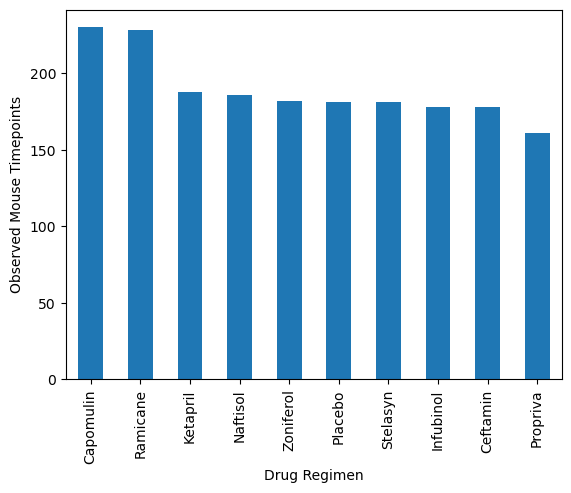

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_count = clean_df['Drug Regimen'].value_counts()
mice_count.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Observed Mouse Timepoints")






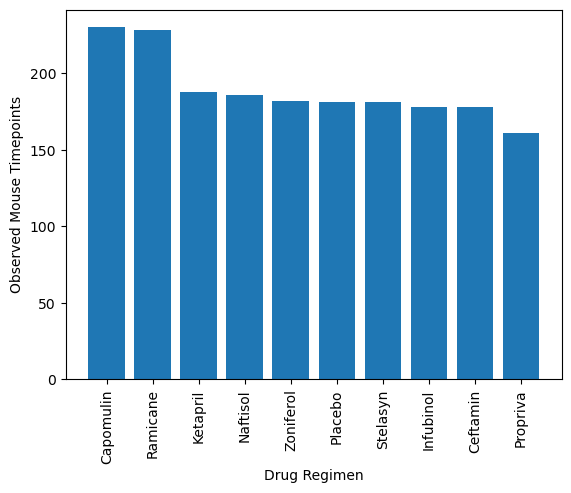

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

mice_count = clean_df['Drug Regimen'].value_counts()
plt.bar(mice_count.index.values,mice_count.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()


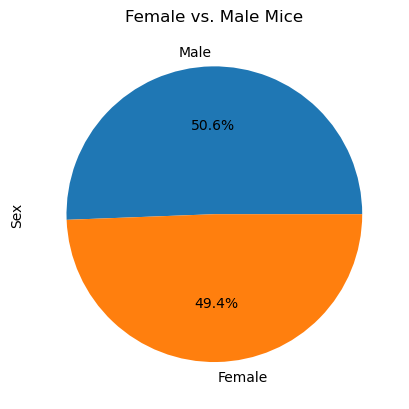

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

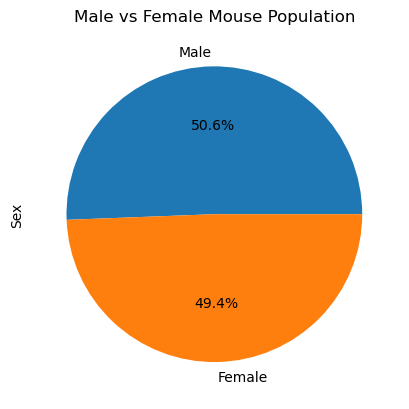

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

1. Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Then, calculate the quartiles and IQR, and determine if there are any potential outliers across all four treatment regimens. Use the following substeps:
- Create a grouped DataFrame that shows the last (greatest) time point for each mouse. Merge this grouped DataFrame with the original cleaned DataFrame.
- Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.
- Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.
- Determine outliers by using the upper and lower bounds, and then print the results.
2. Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group. Highlight any potential outliers in the plot by changing their color and style.

hint: All four box plots should be within the same figure. Use this Matplotlib documentation page Links to an external site. for help with changing the style of the outliers.

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [80]:
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [81]:
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [82]:
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Capomulin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [95]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_tumor = Capomulin_merge["Tumor Volume (mm3)"]
quartiles = Capomulin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) {lower_bound}.")
print(f"Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) {upper_bound}.")



Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 25.355449580000002.
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 87.66645829999999.


In [97]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ramicane_tumor = Ramicane_merge["Tumor Volume (mm3)"]
quartiles = Ramicane_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) {lower_bound}.")
print(f"Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) {upper_bound}.")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 17.912664470000003.
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 54.30681135.


In [98]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infubinol_tumor = Infubinol_merge["Tumor Volume (mm3)"]
quartiles = Infubinol_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) {lower_bound}.")
print(f"Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64){upper_bound}.")

Infubinol_merge.to_csv("output.csv")



Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 36.83290494999999.
Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)82.74144559000001.


In [99]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) {lower_bound}.")
print(f"Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) {upper_bound}.")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 25.355449580000002.
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 87.66645829999999.


In [101]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [Capomulin_tumor, Ramicane_tumor, Infubinol_tumor, Ceftamin_tumors]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    print(drug)
    quartiles = Capomulin_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq


    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)



Capomulin
Ramicane
Infubinol
Ceftamin


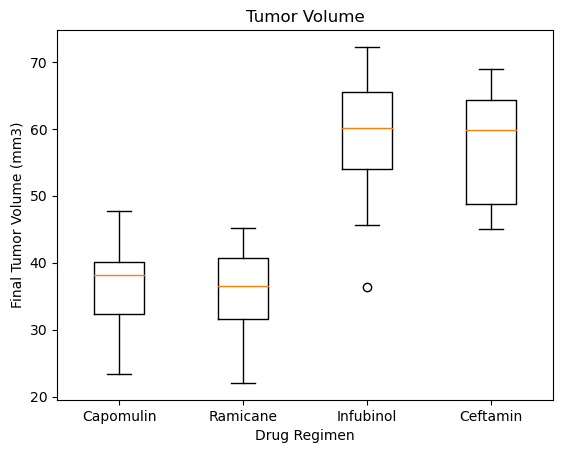

In [109]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

Select a single mouse that was treated with Capomulin, and generate a line plot of tumor volume versus time point for that mouse.

Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen.

In [118]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


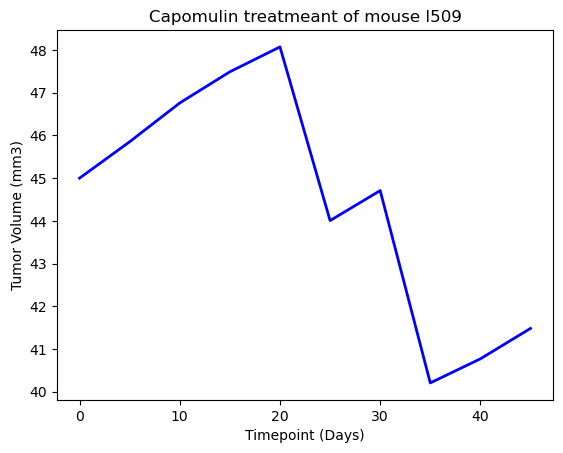

In [122]:
x_axis = forline_df["Timepoint"]
tumor_size = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_size,linewidth=2,markersize="12",color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

/var/folders/bw/19b5cf5j7f38vd208wvypvrc0000gn/T/ipykernel_4279/4173512144.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_average = Capomulin_df.groupby(['Mouse ID']).mean()


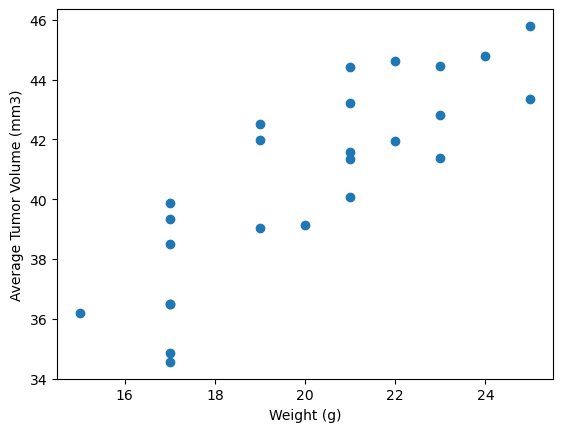

In [127]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_average = Capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

Calculate the correlation coefficient and linear regression model between mouse weight and average observed tumor volume for the entire Capomulin treatment regimen.

Plot the linear regression model on top of the previous scatter plot.

In [128]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


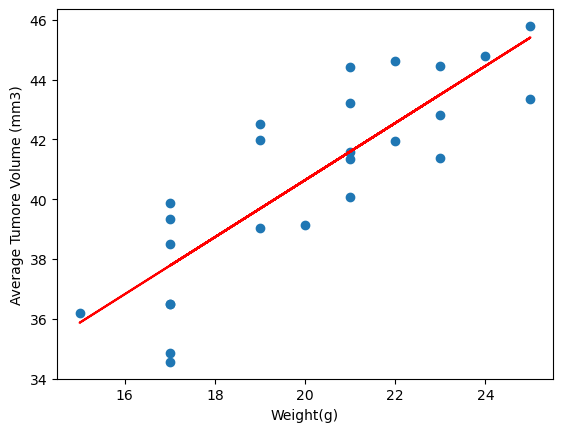

In [129]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
regress_values = capomulin_average['Weight (g)'] * slope + intercept
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],regress_values,"r-")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()